<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Assignment_3_Simple_Linear_regression_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problam statement
- Salary_hike -> Build a prediction model for Salary_hike



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data set folder/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.shape

(30, 2)

In [ ]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

**Observation** > Their is no Na values present in dataset

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

**Observation** > Their is no Dublicate data is psreset in dataset

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Observation** > The average of Salary is '76003' and average of YearsExperience	 is'5.3'

# Visualizing the data 

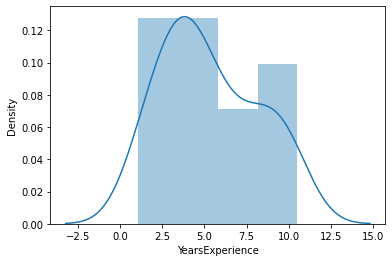

In [ ]:
sns.distplot(df['YearsExperience'])

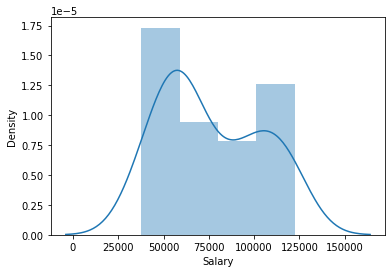

In [ ]:
sns.distplot(df['Salary'])

**Observation** > The dats is not normaly distrybuted

## Finding the outliers

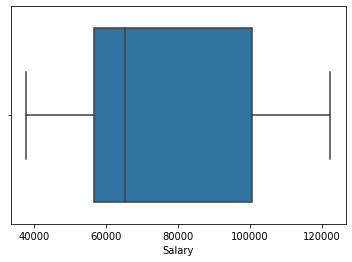

In [ ]:
sns.boxplot(df['Salary'])

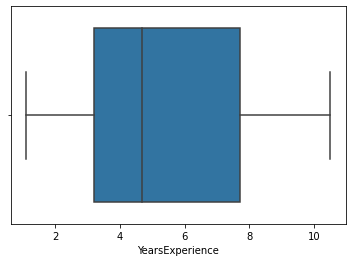

In [ ]:
sns.boxplot(df['YearsExperience'])

**Their is no outliers present in the data**

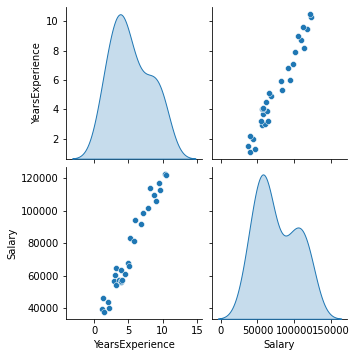

In [ ]:
sns.pairplot(df, diag_kind="kde")

# **Finding Correlation between to columns**

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


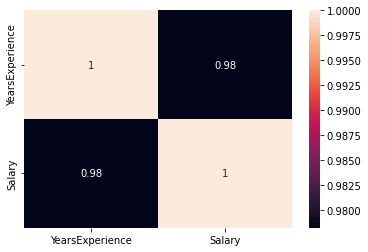

In [ ]:
sns.heatmap(df.corr(), annot=True)

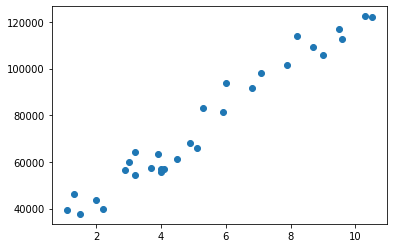

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])

# **Buliding the Model**

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data = df).fit()

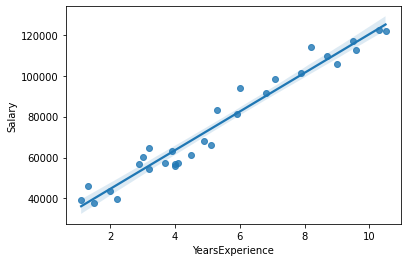

In [ ]:
sns.regplot(x='YearsExperience', y='Salary', data=df)

In [ ]:
#Coefficent
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [ ]:
#t and p-values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


# Predict for new data point

In [ ]:
new_data = pd.Series([1.1,1.7,2.3,3.5])

In [ ]:
df_pred = pd.DataFrame(new_data,columns=['YearsExperience'])

In [ ]:
model.predict(df_pred)

0    36187.158752
1    41857.136145
2    47527.113538
3    58867.068324
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        10:15:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#residual analysis
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

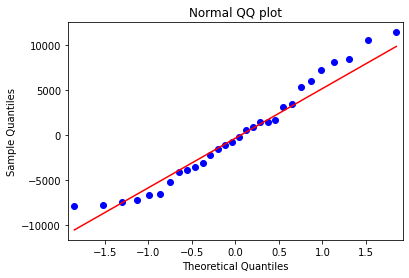

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q')
plt.title('Normal QQ plot')
plt.show()

# Testing the predicted Values

In [ ]:
df2_pred = pd.DataFrame(df['YearsExperience'])

In [ ]:
pred = model.predict(df2_pred)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

# Metrics
## Finding mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
mse = mean_squared_error(df['Salary'],pred)
mse

31270951.72228097

In [ ]:
sq = sqrt(mse)
sq

5592.043608760662